In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from src.config.config import config

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arspa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv(PROJECT_ROOT / "data" / "raw" / "Test_AI_Human.csv")

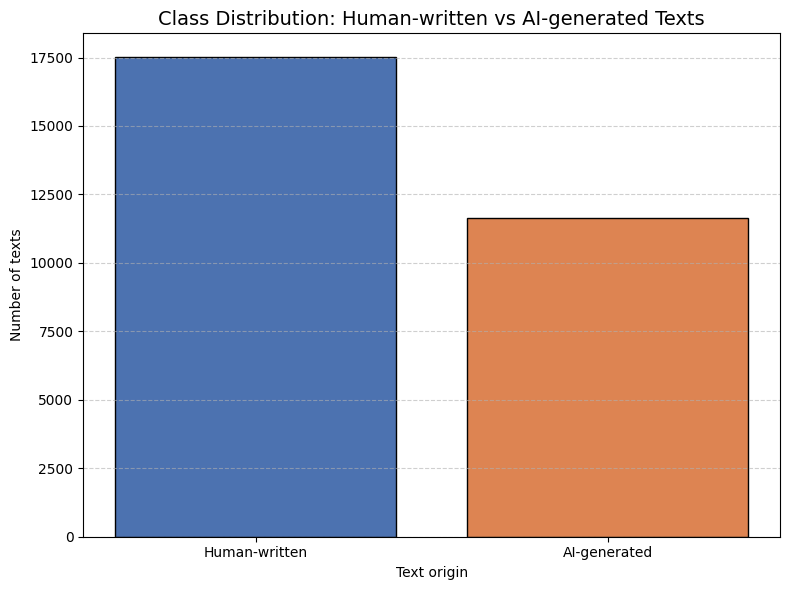

(np.float64(-1.0999985641149026),
 np.float64(1.0999995247895502),
 np.float64(-1.0999993419356568),
 np.float64(1.0999931822569198))

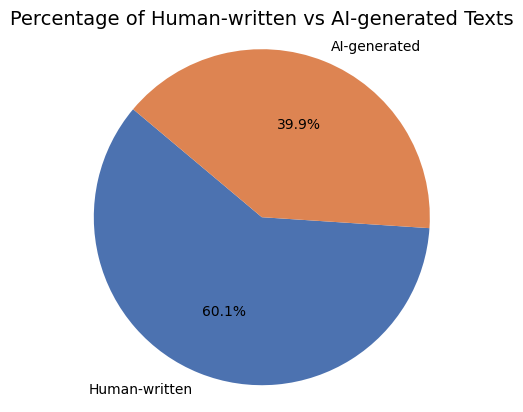

In [5]:
# Amount of each class

all_amount = len(df)
human_written_amount = (df["generated"] == 0).sum()
ai_generated_amount = (df["generated"] == 1).sum()

labels = ["Human-written", "AI-generated"]
counts = [human_written_amount, ai_generated_amount]
colors = ["#4C72B0", "#DD8452"]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors, edgecolor="black")


plt.title("Class Distribution: Human-written vs AI-generated Texts", fontsize=14)
plt.ylabel("Number of texts")
plt.xlabel("Text origin")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# Percentage of each class
plt.pie(counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Human-written vs AI-generated Texts", fontsize=14)
plt.axis("equal")


Text(0, 0.5, 'Average number of words')

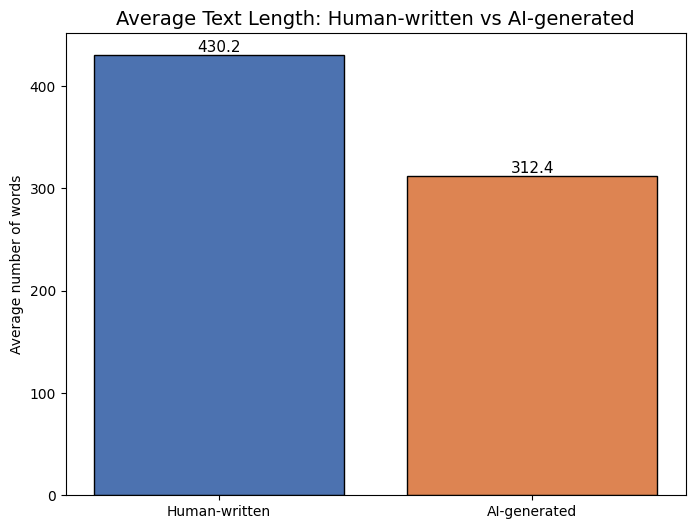

In [6]:
# Average length of texts in each class
df["text_length"] = df["text"].apply(lambda x: len(x.split()))
avg_human_length = df[df["generated"] == 0]["text_length"].mean()
avg_ai_length = df[df["generated"] == 1]["text_length"].mean()

labels = ["Human-written", "AI-generated"]
avg_lengths = [avg_human_length, avg_ai_length]
colors = ["#4C72B0", "#DD8452"]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, avg_lengths, color=colors, edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=11
    )
plt.title("Average Text Length: Human-written vs AI-generated", fontsize=14)
plt.ylabel("Average number of words")

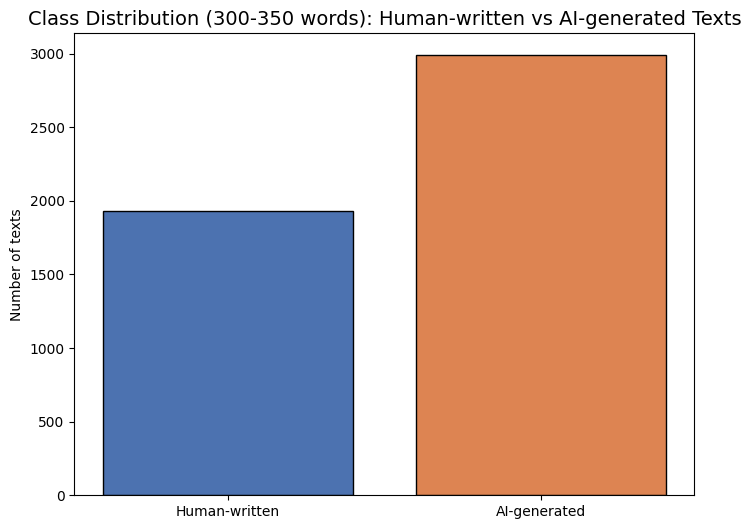

In [7]:
# We will be training in texts, length of words is from 300 to 350
# Amount of texts with length between 300 and 350 words:

length_filtered_df = df[(df["text_length"] >= config.dataset_analyze.MIN_TEXT_LENGTH) & (df["text_length"] <= config.dataset_analyze.MAX_TEXT_LENGTH)]

filtered_human_amount = (length_filtered_df["generated"] == 0).sum()
filtered_ai_amount = (length_filtered_df["generated"] == 1).sum()

labels = ["Human-written", "AI-generated"]
counts = [filtered_human_amount, filtered_ai_amount]
colors = ["#4C72B0", "#DD8452"]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors, edgecolor="black")


plt.title("Class Distribution (300-350 words): Human-written vs AI-generated Texts", fontsize=14)
plt.ylabel("Number of texts")

plt.show()

In [ ]:
# Preprocessing dataset for training and validation will be done in the next notebook.
# We got aboout 1_500 texts of length between 300 and 350 words for each class (AI-generated and human-written).
# So will use for 1_500 texts for training and validation.


balanced_length_filtered_df = pd.concat([
    length_filtered_df[length_filtered_df["generated"] == 0].sample(config.dataset_analyze.HUMAN_WRITTEN_TEST_DATASET_SIZE, random_state=42),
    length_filtered_df[length_filtered_df["generated"] == 1].sample(config.dataset_analyze.AI_GENERATED_TEST_DATASET_SIZE, random_state=42)
]).reset_index(drop=True)

balanced_length_filtered_df.to_csv(PROJECT_ROOT / "data" / "processed" / "balanced_length_filtered_test_dataset.csv", index=False)